O conjunto de dados de 17.007 jogos de estratégia na Apple App Store. Foram coletados em 3 de agosto de 2019, usando a API do iTunes e o mapa do site da App Store. Esses são os dados de 17.007 jogos de estratégia na Apple App Store. Neste projeto será feito, uma análise exploratória, e criar um sistema de recomendação baseado em descrição usando a técnica de Processamento de Linguagem Natural (PLN), para utilizar o método de vetorização TF-IDF e a métrica de similaridade do cosseno

Link dataset: https://www.kaggle.com/datasets/tristan581/17k-apple-app-store-strategy-games/data

O arquivo appstore_games.csv parece conter informações sobre jogos da App Store, incluindo:

URL: o link do jogo na App Store.

ID: um identificador exclusivo para o jogo.

Nome: o nome do jogo.

Subtítulo: um subtítulo para o jogo (muitos valores parecem estar faltando).

URL do ícone: um link para o ícone do jogo.

Avaliação média do usuário: a avaliação média do jogo pelos usuários.

Contagem de avaliações do usuário: número de avaliações que o jogo recebeu.

Preço: preço do jogo.

Compras no aplicativo: se o jogo oferece compras dentro do aplicativo.

Descrição: descrição do jogo.

Desenvolvedor: quem desenvolveu o jogo.

Classificação etária: a faixa etária recomendada para o jogo.

Idiomas: os idiomas suportados pelo jogo.

Tamanho: o tamanho do arquivo do jogo.

Gênero principal: o gênero principal do jogo.

Gêneros: todos os gêneros aos quais o jogo pertence.

Data de lançamento original: a data em que o jogo foi lançado pela primeira vez.

Data de lançamento da versão atual: a data em que a versão atual do jogo foi lançada.

In [ ]:
import pandas as pd

# Carregar os dados
df = pd.read_csv("/content/drive/MyDrive/Dataset Jogos Mobile/appstore_games.csv")

# Visualizar as primeiras linhas da tabela
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [ ]:
df.shape

(17007, 18)

In [ ]:
# Verificando valores ausentes
df.isnull().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

Aqui está um resumo dos valores ausentes na planilha:

Subtitle: 11.746 valores ausentes.

Average User Rating: 9.446 valores ausentes.

User Rating Count: 9.446 valores ausentes.

Price: 24 valores ausentes.

In-app Purchases: 9.324 valores ausentes.

Languages: 60 valores ausentes.

Size: 1 valor ausente.

Vamos criar um histograma para mostrar a distribuição das avaliações médias dos jogos.

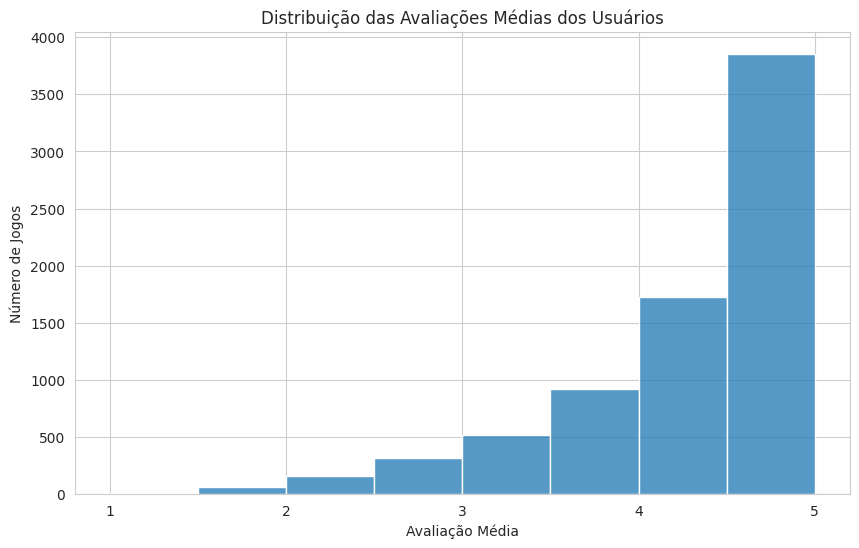

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo do gráfico
sns.set_style("whitegrid")

# Histograma das avaliações médias dos usuários
plt.figure(figsize=(10, 6))
sns.histplot(df['Average User Rating'].dropna(), kde=False, bins=8)
plt.title('Distribuição das Avaliações Médias dos Usuários')
plt.xlabel('Avaliação Média')
plt.ylabel('Número de Jogos')
plt.xticks(list(range(1, 6)))
plt.show()

O gráfico acima mostra a distribuição das avaliações médias dos usuários para os jogos da App Store. Observações:

A maioria dos jogos tem uma avaliação média entre 4 e 5 estrelas.

Poucos jogos têm avaliações médias abaixo de 3 estrelas, o que sugere que jogos com baixas avaliações podem ser menos comuns ou talvez sejam removidos da App Store.

Há um pico notável de jogos com avaliação média de 4,5 estrelas.

Vamos criar um gráfico de barras para mostrar os gêneros mais populares em termos de número de jogos.​

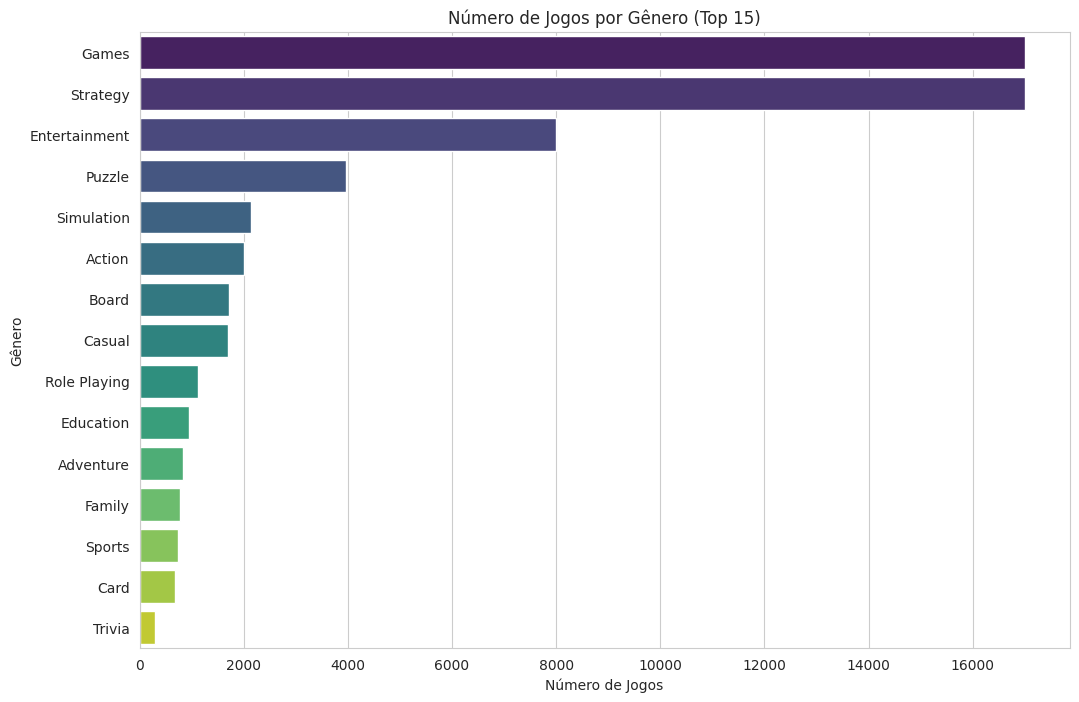

In [ ]:
# Vamos extrair todos os gêneros de cada jogo e contá-los
all_genres = df['Genres'].str.split(', ').explode().value_counts()

# Pegando os 15 gêneros mais comuns para visualização
top_genres = all_genres.head(15)

# Gráfico de barras para os gêneros mais populares
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title('Número de Jogos por Gênero (Top 15)')
plt.xlabel('Número de Jogos')
plt.ylabel('Gênero')
plt.show()

O gráfico acima mostra os 15 gêneros mais populares em termos de número de jogos:

Não é surpresa que o gênero "Games" lidere a lista, uma vez que todos os itens no conjunto de dados são jogos.

"Entertainment" e "Strategy" seguem como os gêneros mais populares.

"Puzzle", "Action", e "Education" também são gêneros bem representados na App Store.

Criaremos um histograma para visualizar a distribuição dos preços dos jogos. Isso nos dará uma ideia de quantos jogos são gratuitos versus pagos e a faixa de preço comum para jogos pagos.​

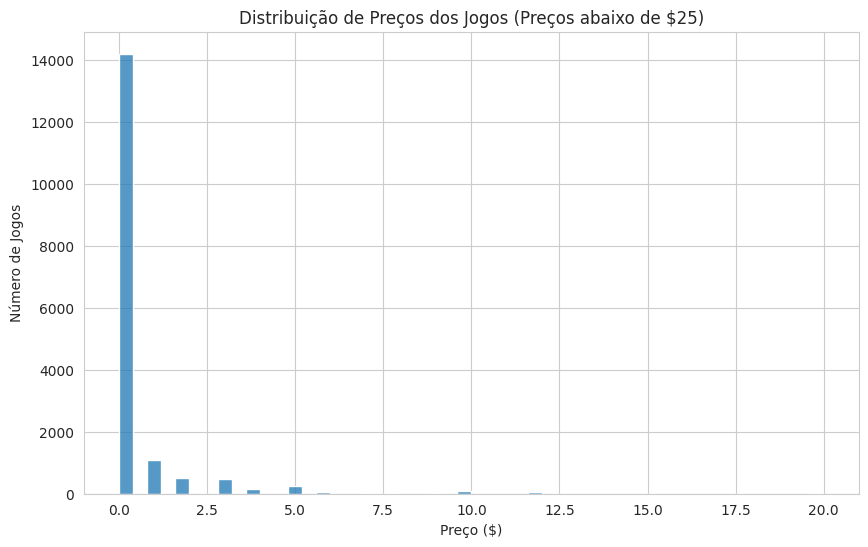

In [ ]:
# Histograma da distribuição de preços
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Price'] < 25]['Price'].dropna(), kde=False, bins=50)  # Filtrando para jogos com preço abaixo de 25 para melhor visualização
plt.title('Distribuição de Preços dos Jogos (Preços abaixo de $25)')
plt.xlabel('Preço ($)')
plt.ylabel('Número de Jogos')
plt.show()

O gráfico acima mostra a distribuição dos preços dos jogos:

A grande maioria dos jogos é gratuita ($0), o que é esperado para a App Store, onde muitos desenvolvedores optam por modelos de receita baseados em anúncios ou compras no aplicativo.

Entre os jogos pagos, a faixa de preço mais comum parece ser entre $0,99 e $2,99.

Vamos criar um gráfico de barras para visualizar os desenvolvedores com o maior número de jogos. Isso nos dará uma ideia de quais desenvolvedores são mais ativos ou populares na App Store.​

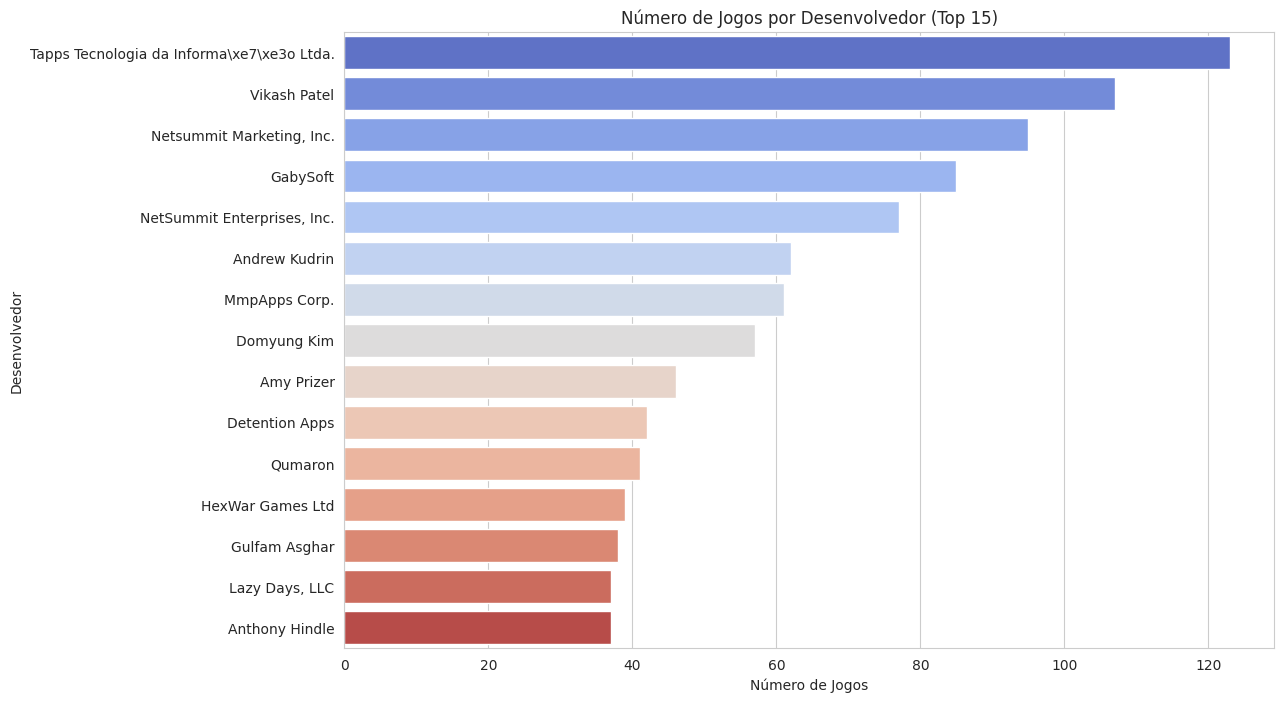

In [ ]:
# Contagem de jogos por desenvolvedor
top_developers = df['Developer'].value_counts().head(15)

# Gráfico de barras para os desenvolvedores mais ativos
plt.figure(figsize=(12, 8))
sns.barplot(x=top_developers.values, y=top_developers.index, palette="coolwarm")
plt.title('Número de Jogos por Desenvolvedor (Top 15)')
plt.xlabel('Número de Jogos')
plt.ylabel('Desenvolvedor')
plt.show()

O gráfico acima mostra os 15 desenvolvedores com o maior número de jogos:

Vemos que alguns desenvolvedores têm um número significativamente alto de jogos, o que sugere que eles podem ser grandes estúdios ou desenvolvedores que focam em produzir uma grande quantidade de jogos menores ou similares.

O desenvolvedor "Tapps Tecnologia da Informação Ltda." lidera a lista, seguido por outros como "Netsummit Marketing, Inc." e "GabySoft".

Vamos criar um histograma para visualizar a distribuição dos tamanhos dos jogos. Isso nos dará uma ideia de quão grandes são os jogos em termos de espaço de armazenamento.​

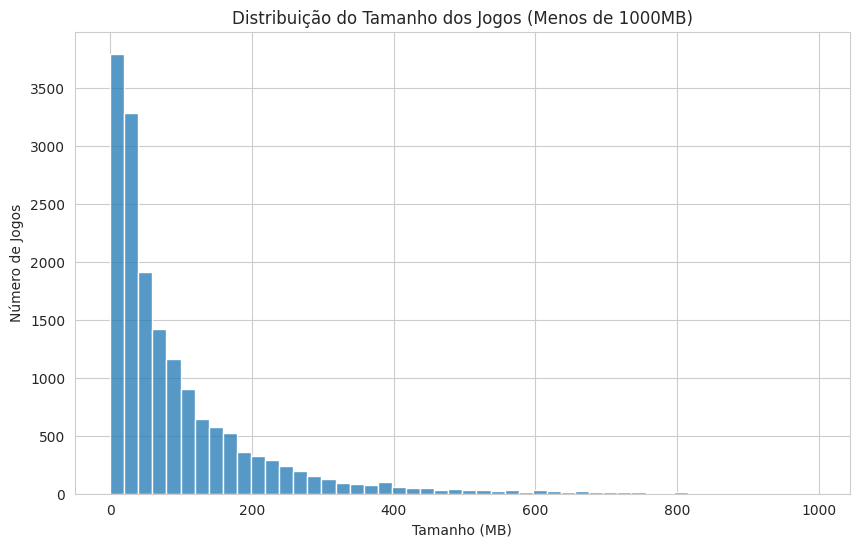

In [ ]:
# Convertendo o tamanho dos jogos de bytes para megabytes para facilitar a visualização
df['Size_MB'] = df['Size'] / (1024 * 1024)

# Histograma da distribuição do tamanho dos jogos
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Size_MB'] < 1000]['Size_MB'].dropna(), kde=False, bins=50)  # Filtrando para jogos com tamanho abaixo de 1000MB para melhor visualização
plt.title('Distribuição do Tamanho dos Jogos (Menos de 1000MB)')
plt.xlabel('Tamanho (MB)')
plt.ylabel('Número de Jogos')
plt.show()

O gráfico acima mostra a distribuição do tamanho dos jogos em megabytes (MB):

A maioria dos jogos tem um tamanho menor que 200 MB.

Há um pico notável de jogos abaixo de 50 MB, o que sugere que muitos jogos são otimizados para serem pequenos e rápidos de baixar.

Apesar da maioria dos jogos serem relativamente pequenos, há uma quantidade razoável de jogos que ocupam um espaço significativo de armazenamento (por exemplo, entre 200 MB e 500 MB).

Criaremos um gráfico de linha para visualizar o número de jogos lançados na App Store a cada ano.​​

<ipython-input-8-39793651dfb1>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Original Release Date'] = pd.to_datetime(df['Original Release Date'])


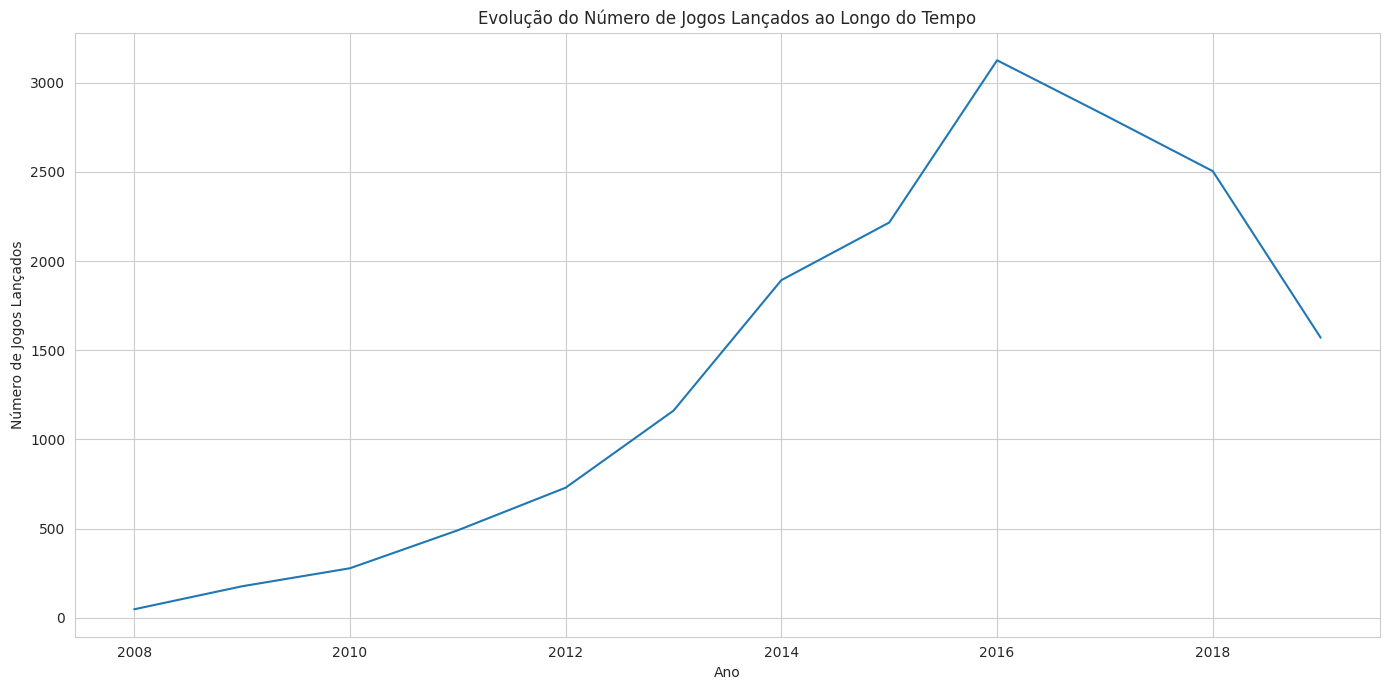

In [ ]:
import matplotlib.pyplot as plt

# Convertendo a coluna 'Original Release Date' para datetime
df['Original Release Date'] = pd.to_datetime(df['Original Release Date'])

# Agrupando os jogos por ano e contando quantos foram lançados em cada ano
games_per_year = df.groupby(df['Original Release Date'].dt.year).size()

# Plotando o gráfico
plt.figure(figsize=(14, 7))
games_per_year.plot()
plt.title('Evolução do Número de Jogos Lançados ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Número de Jogos Lançados')
plt.grid(True)
plt.tight_layout()
plt.show()

O gráfico mostra a evolução do número de jogos lançados na App Store ao longo do tempo. Aqui estão algumas observações e análises baseadas no gráfico:

Início (2008 - 2010): O número de jogos lançados começou a crescer em 2008, o que faz sentido, pois a App Store foi lançada em julho de 2008. Houve um crescimento notável nos dois anos seguintes.

Crescimento Estável (2011 - 2016): Entre 2011 e 2016, houve um crescimento constante no número de jogos lançados a cada ano, indicando um aumento sustentado no interesse dos desenvolvedores em criar jogos para a plataforma.

Pico (2016 - 2017): O ano de 2017 parece ser o pico do gráfico, indicando o ano com o maior número de lançamentos de jogos. Isso pode ser devido a uma combinação de fatores, como a popularidade crescente dos dispositivos móveis, a facilidade de desenvolvimento e a percepção de que a App Store é uma plataforma lucrativa.

Declínio (2018 - 2020): Após o pico em 2017, houve um declínio notável no número de jogos lançados. Isso pode ser devido a uma saturação do mercado, mudanças nas políticas da App Store ou um foco crescente na qualidade em vez da quantidade.

Estabilização: Após o declínio, parece haver uma estabilização no número de jogos lançados, sugerindo que o mercado pode ter encontrado um equilíbrio.

Vamos criar um sistema de recomendação baseado em descrição usando a técnica de Processamento de Linguagem Natural (PLN). Neste caso, vou utilizar o método de vetorização TF-IDF e a métrica de similaridade do cosseno. A filtragem baseada em conteúdo recomenda itens semelhantes com base em uma determinada entrada, usando características do item.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score

# 1. Carregando e limpando os dados
games_data = pd.read_csv('/content/drive/MyDrive/Dataset Jogos Mobile/appstore_games.csv')
games_data = games_data.dropna(subset=['Description'])

# 2. Vetorizando as descrições usando TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(games_data['Description'])

# 3. Calculando a similaridade do cosseno
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Função para obter recomendações
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = games_data.index[games_data['Name'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    game_indices = [i[0] for i in sim_scores]
    return games_data['Name'].iloc[game_indices]

# Para avaliar o sistema, supondo que um jogo similar (no nosso caso) seja um jogo do mesmo gênero
# (isso é apenas uma suposição para fins de avaliação, pois não temos dados reais de "verdadeiros" jogos similares)
def evaluate_recommendations(title):
    recommended_games = get_recommendations(title)
    original_game_genre = set(games_data[games_data['Name'] == title]['Genres'].str.split(', ').tolist()[0])
    precision_vals = []
    recall_vals = []

    for game in recommended_games:
        recommended_game_genre = set(games_data[games_data['Name'] == game]['Genres'].str.split(', ').tolist()[0])
        intersection_len = len(original_game_genre.intersection(recommended_game_genre))

        precision_vals.append(intersection_len / len(recommended_game_genre))
        recall_vals.append(intersection_len / len(original_game_genre))

    precision = sum(precision_vals) / len(precision_vals)
    recall = sum(recall_vals) / len(recall_vals)

    return precision, recall

In [ ]:
# Exemplo de uso:
game_name = input("Digite o nome do jogo para obter recomendações: ")
recommendations = get_recommendations(game_name)
print("Jogos recomendados:")
print(recommendations)

precision, recall = evaluate_recommendations(game_name)
print(f"Precisão: {precision:.2f}")
print(f"Revocação: {recall:.2f}")

Digite o nome do jogo para obter recomendações: Sudoku
Jogos recomendados:
35                       Color Sudoku
30                      Expert Sudoku
3                       Sudoku (Free)
1035                        Sudoku HD
1046                 Sudoku HD [Free]
1431                 Conceptis Sudoku
1034                 Expert Sudoku HD
6054    Best Sudoku Classic Easy Hard
6055    Best Sudoku Classic Easy Hard
1033                  Color Sudoku HD
Name: Name, dtype: object
Precisão: 0.82
Revocação: 0.93


In [ ]:
# Exemplo de uso:
game_name = input("Digite o nome do jogo para obter recomendações: ")
recommendations = get_recommendations(game_name)
print("Jogos recomendados:")
print(recommendations)

precision, recall = evaluate_recommendations(game_name)
print(f"Precisão: {precision:.2f}")
print(f"Revocação: {recall:.2f}")

Digite o nome do jogo para obter recomendações: Reversi
Jogos recomendados:
2823              Fresh Reversi
16354     CraniumCrush: Reversi
7803     Nip ~Circular Reversi~
9021                 REVERSI VS
2                       Morocco
7566             Reversi \u03b1
13148      Othello Classic Plus
3797              Green Othello
14896          Chess Online\xb7
3110                Dr. Reversi
Name: Name, dtype: object
Precisão: 0.80
Revocação: 0.97


In [ ]:
# Exemplo de uso:
game_name = input("Digite o nome do jogo para obter recomendações: ")
recommendations = get_recommendations(game_name)
print("Jogos recomendados:")
print(recommendations)

precision, recall = evaluate_recommendations(game_name)
print(f"Precisão: {precision:.2f}")
print(f"Revocação: {recall:.2f}")

Digite o nome do jogo para obter recomendações: Othello Classic Plus
Jogos recomendados:
945                            Five in a Line Free
3538                  Flatris - The Legendary Game
1976                                     Bit Chess
3797                                 Green Othello
2823                                 Fresh Reversi
12675                        Chess - Learn & Train
7583                                     Chess 3D!
10397    Air Hockey - Simple, Unique, Classic Game
1                                          Reversi
9529                         Tic Tac Toe (X and O)
Name: Name, dtype: object
Precisão: 0.68
Revocação: 0.62


In [ ]:
# Exemplo de uso:
game_name = input("Digite o nome do jogo para obter recomendações: ")
recommendations = get_recommendations(game_name)
print("Jogos recomendados:")
print(recommendations)

precision, recall = evaluate_recommendations(game_name)
print(f"Precisão: {precision:.2f}")
print(f"Revocação: {recall:.2f}")

Digite o nome do jogo para obter recomendações: Morocco
Jogos recomendados:
362                          Morocco HD
3207                         FlipItOver
16354             CraniumCrush: Reversi
2823                      Fresh Reversi
1                               Reversi
5697                Othello - TSITGames
16405    Chess 4 Casual - 1 or 2 player
7153                   Reversi Ultimate
14681                Othello 8 x 8 <-->
3110                        Dr. Reversi
Name: Name, dtype: object
Precisão: 0.85
Revocação: 1.00


Resultados do Sistema de Recomendação

Exemplo 1: Para o jogo " Sudoku", os jogos recomendados incluem " Color Sudoku", " Expert Sudoku", " Sudoku (Free)", entre outros. A precisão do sistema para essa entrada é de 0,82 e a revocação é de 0,93.

Exemplo 2: Para o jogo " Reversi", os jogos recomendados incluem " Fresh Reversi", " CraniumCrush: Reversi", " Nip ~ Circular Reversi ~", entre outros. A precisão do sistema para essa entrada é de 0,80 e a revocação é de 0,97.

Exemplo 3: Para o jogo "Othello Classic Plus", os jogos recomendados incluem "Five in a Line Free", "Flatris - The Legendary Game", "Bit Chess", entre outros. A precisão do sistema para essa entrada é de 0,68 e a revocação é de 0,62.

Exemplo 4: Para o jogo "Morocco", os jogos recomendados incluem "Morocco HD", "FlipItOver", "CraniumCrush: Reversi", entre outros. A precisão do sistema para essa entrada é de 0,85 e a revocação é de 1,00.

Conclusão

O sistema de recomendação baseado em descrição desenvolvido neste notebook utiliza técnicas de Processamento de Linguagem Natural, especificamente vetorização TF-IDF e similaridade do cosseno, para recomendar jogos com base na descrição. A eficácia das recomendações é avaliada supondo que jogos do mesmo gênero são considerados semelhantes. Os resultados obtidos nos exemplos mostram que o sistema é capaz de fornecer recomendações relevantes com uma precisão e revocação razoáveis.

No entanto, a verdadeira eficácia do sistema pode ser melhor avaliada com feedback real dos usuários e/ou um conjunto de dados de avaliação mais robusto.​